# Exploratory Data Analysis Googleplaystore User Review

## Googleplaystore User Review

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Importing data
dfGUserReview = pd.read_csv('dataset/googleplaystore_user_reviews.csv')

Googleplaystore Usert Review adalah dataset mengenai review dari tiap user terhadap aplikasi dalam Googleplaystore dan terdiri dari :

In [2]:
# Baris dan tipe data
dfGUserReview.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [3]:
# Jumlah baris dan kolom
dfGUserReview.shape

(64295, 5)

In [4]:
# nilai unik dari kolom Sentiment
dfGUserReview['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

In [5]:
# nilai unik dari kolom Sentiment Polarity
dfGUserReview['Sentiment_Polarity'].unique()

array([ 1.        ,  0.25      ,         nan, ..., -0.52857143,
       -0.37777778,  0.17333333])

In [6]:
# nilai unik dari kolom Sentiment Subjectivity
dfGUserReview['Sentiment_Subjectivity'].unique()

array([0.53333333, 0.28846154,        nan, ..., 0.51145833, 0.7172619 ,
       0.2594697 ])

In [7]:
# menampilkan dataset
dfGUserReview.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000

In [8]:
# Missing Data pada dfGUserReview
total = dfGUserReview.isnull().sum().sort_values(ascending=False)
percent = (dfGUserReview.isnull().sum()/dfGUserReview.isnull().count()).sort_values(ascending=False)
missing_data_dfGUserReview = pd.concat([total,percent],axis=1, keys=['Total','Percent'])
missing_data_dfGUserReview.head()


Total   Percent
Translated_Review       26868  0.417886
Sentiment_Subjectivity  26863  0.417809
Sentiment_Polarity      26863  0.417809
Sentiment               26863  0.417809
App                         0  0.000000

In [9]:
dfGUserReview = dfGUserReview.drop(dfGUserReview.loc[dfGUserReview['Translated_Review'].isnull()].index)
dfGUserReview = dfGUserReview.drop(dfGUserReview.loc[dfGUserReview['Sentiment_Subjectivity'].isnull()].index)
dfGUserReview = dfGUserReview.drop(dfGUserReview.loc[dfGUserReview['Sentiment_Polarity'].isnull()].index)
dfGUserReview = dfGUserReview.drop(dfGUserReview.loc[dfGUserReview['Sentiment'].isnull()].index)
dfGUserReview.isnull().sum().max()

0

In [10]:
dfGUserReview.head()

App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   
5  10 Best Foods for You                                           Best way   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  
5  Positive                1.00                0.300000

In [11]:
word = dfGUserReview.Translated_Review.values

In [12]:
print(word)

['I like eat delicious food. That\'s I\'m cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"'
 'This help eating healthy exercise regular basis'
 'Works great especially going grocery store' ...
 'Dumb app, I wanted post property rent give option. Website work. Waste time space phone.'
 'I property business got link SMS happy performance still guys need raise bar guys Cheers'
 'Useless app, I searched flats kondapur, Hyderabad . None number reachable I know flats unavailable would keep posts active']


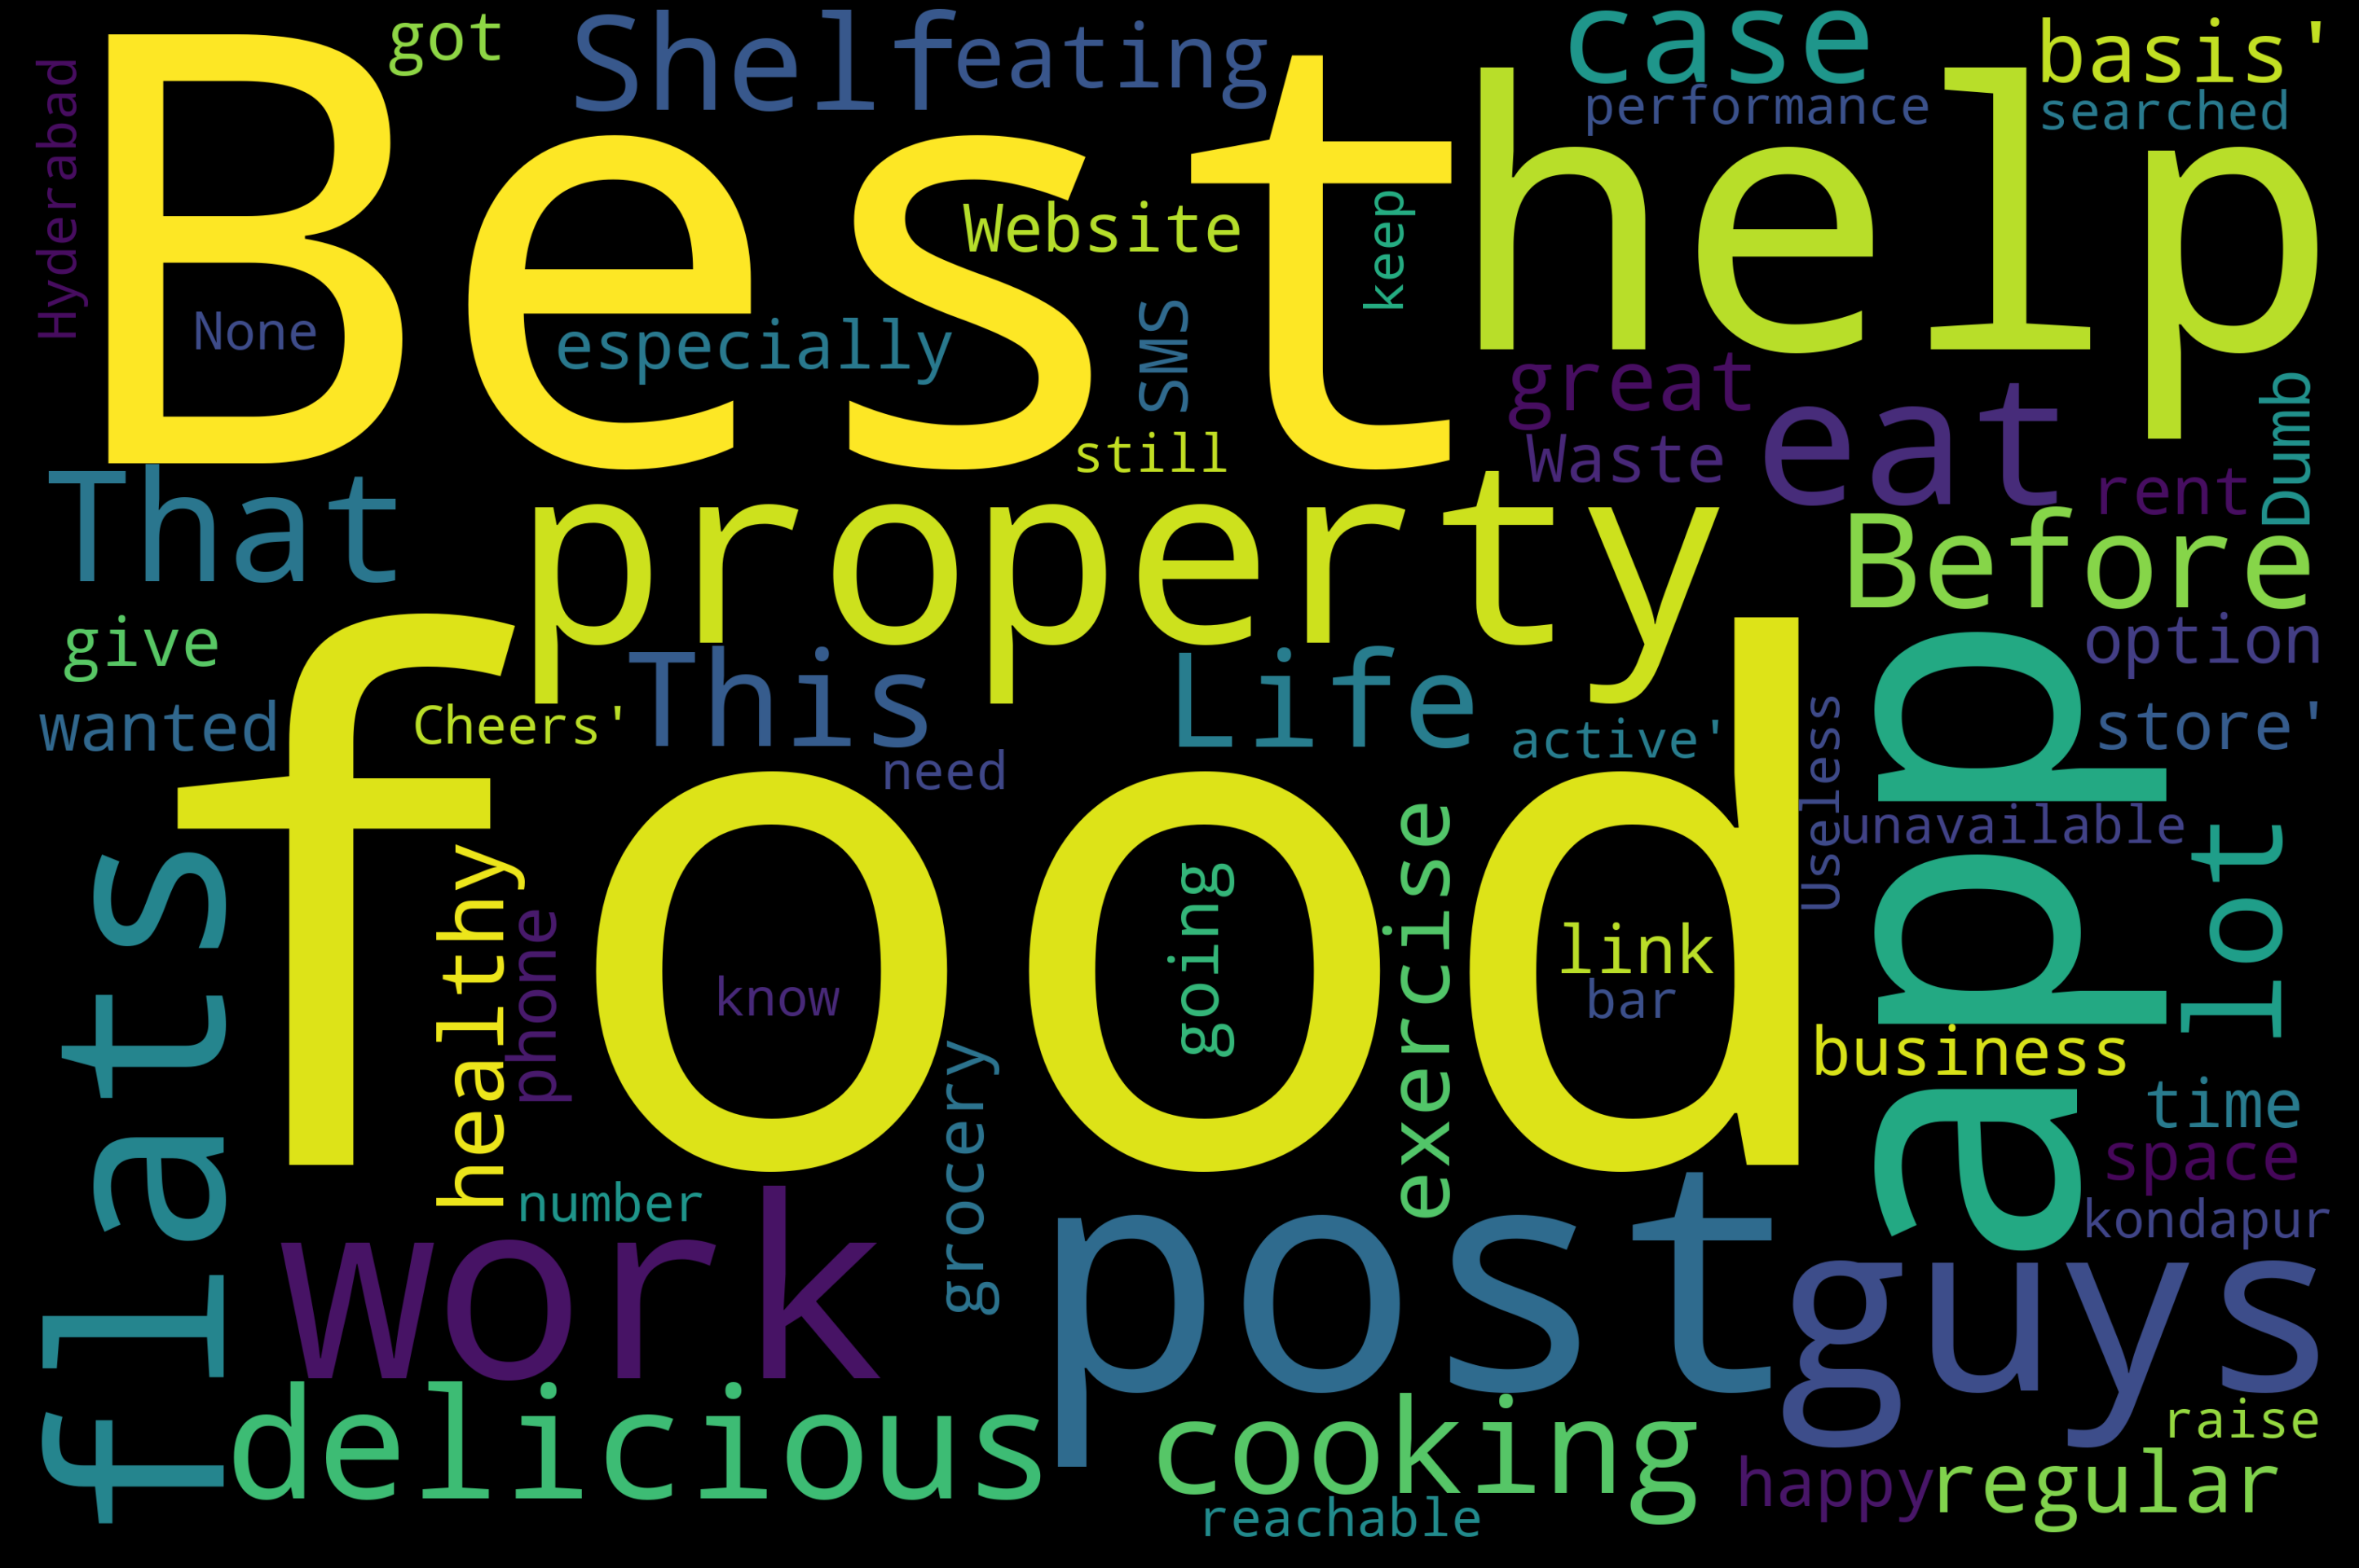

In [13]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(word))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [14]:
review = dfGUserReview.groupby('Sentiment')

In [15]:
dfPositive = review.get_group('Positive')
wordP = dfPositive.Translated_Review.values

dfNegative = review.get_group('Negative')
wordN = dfNegative.Translated_Review.values

dfNeutral = review.get_group('Neutral')
wordT = dfNeutral.Translated_Review.values

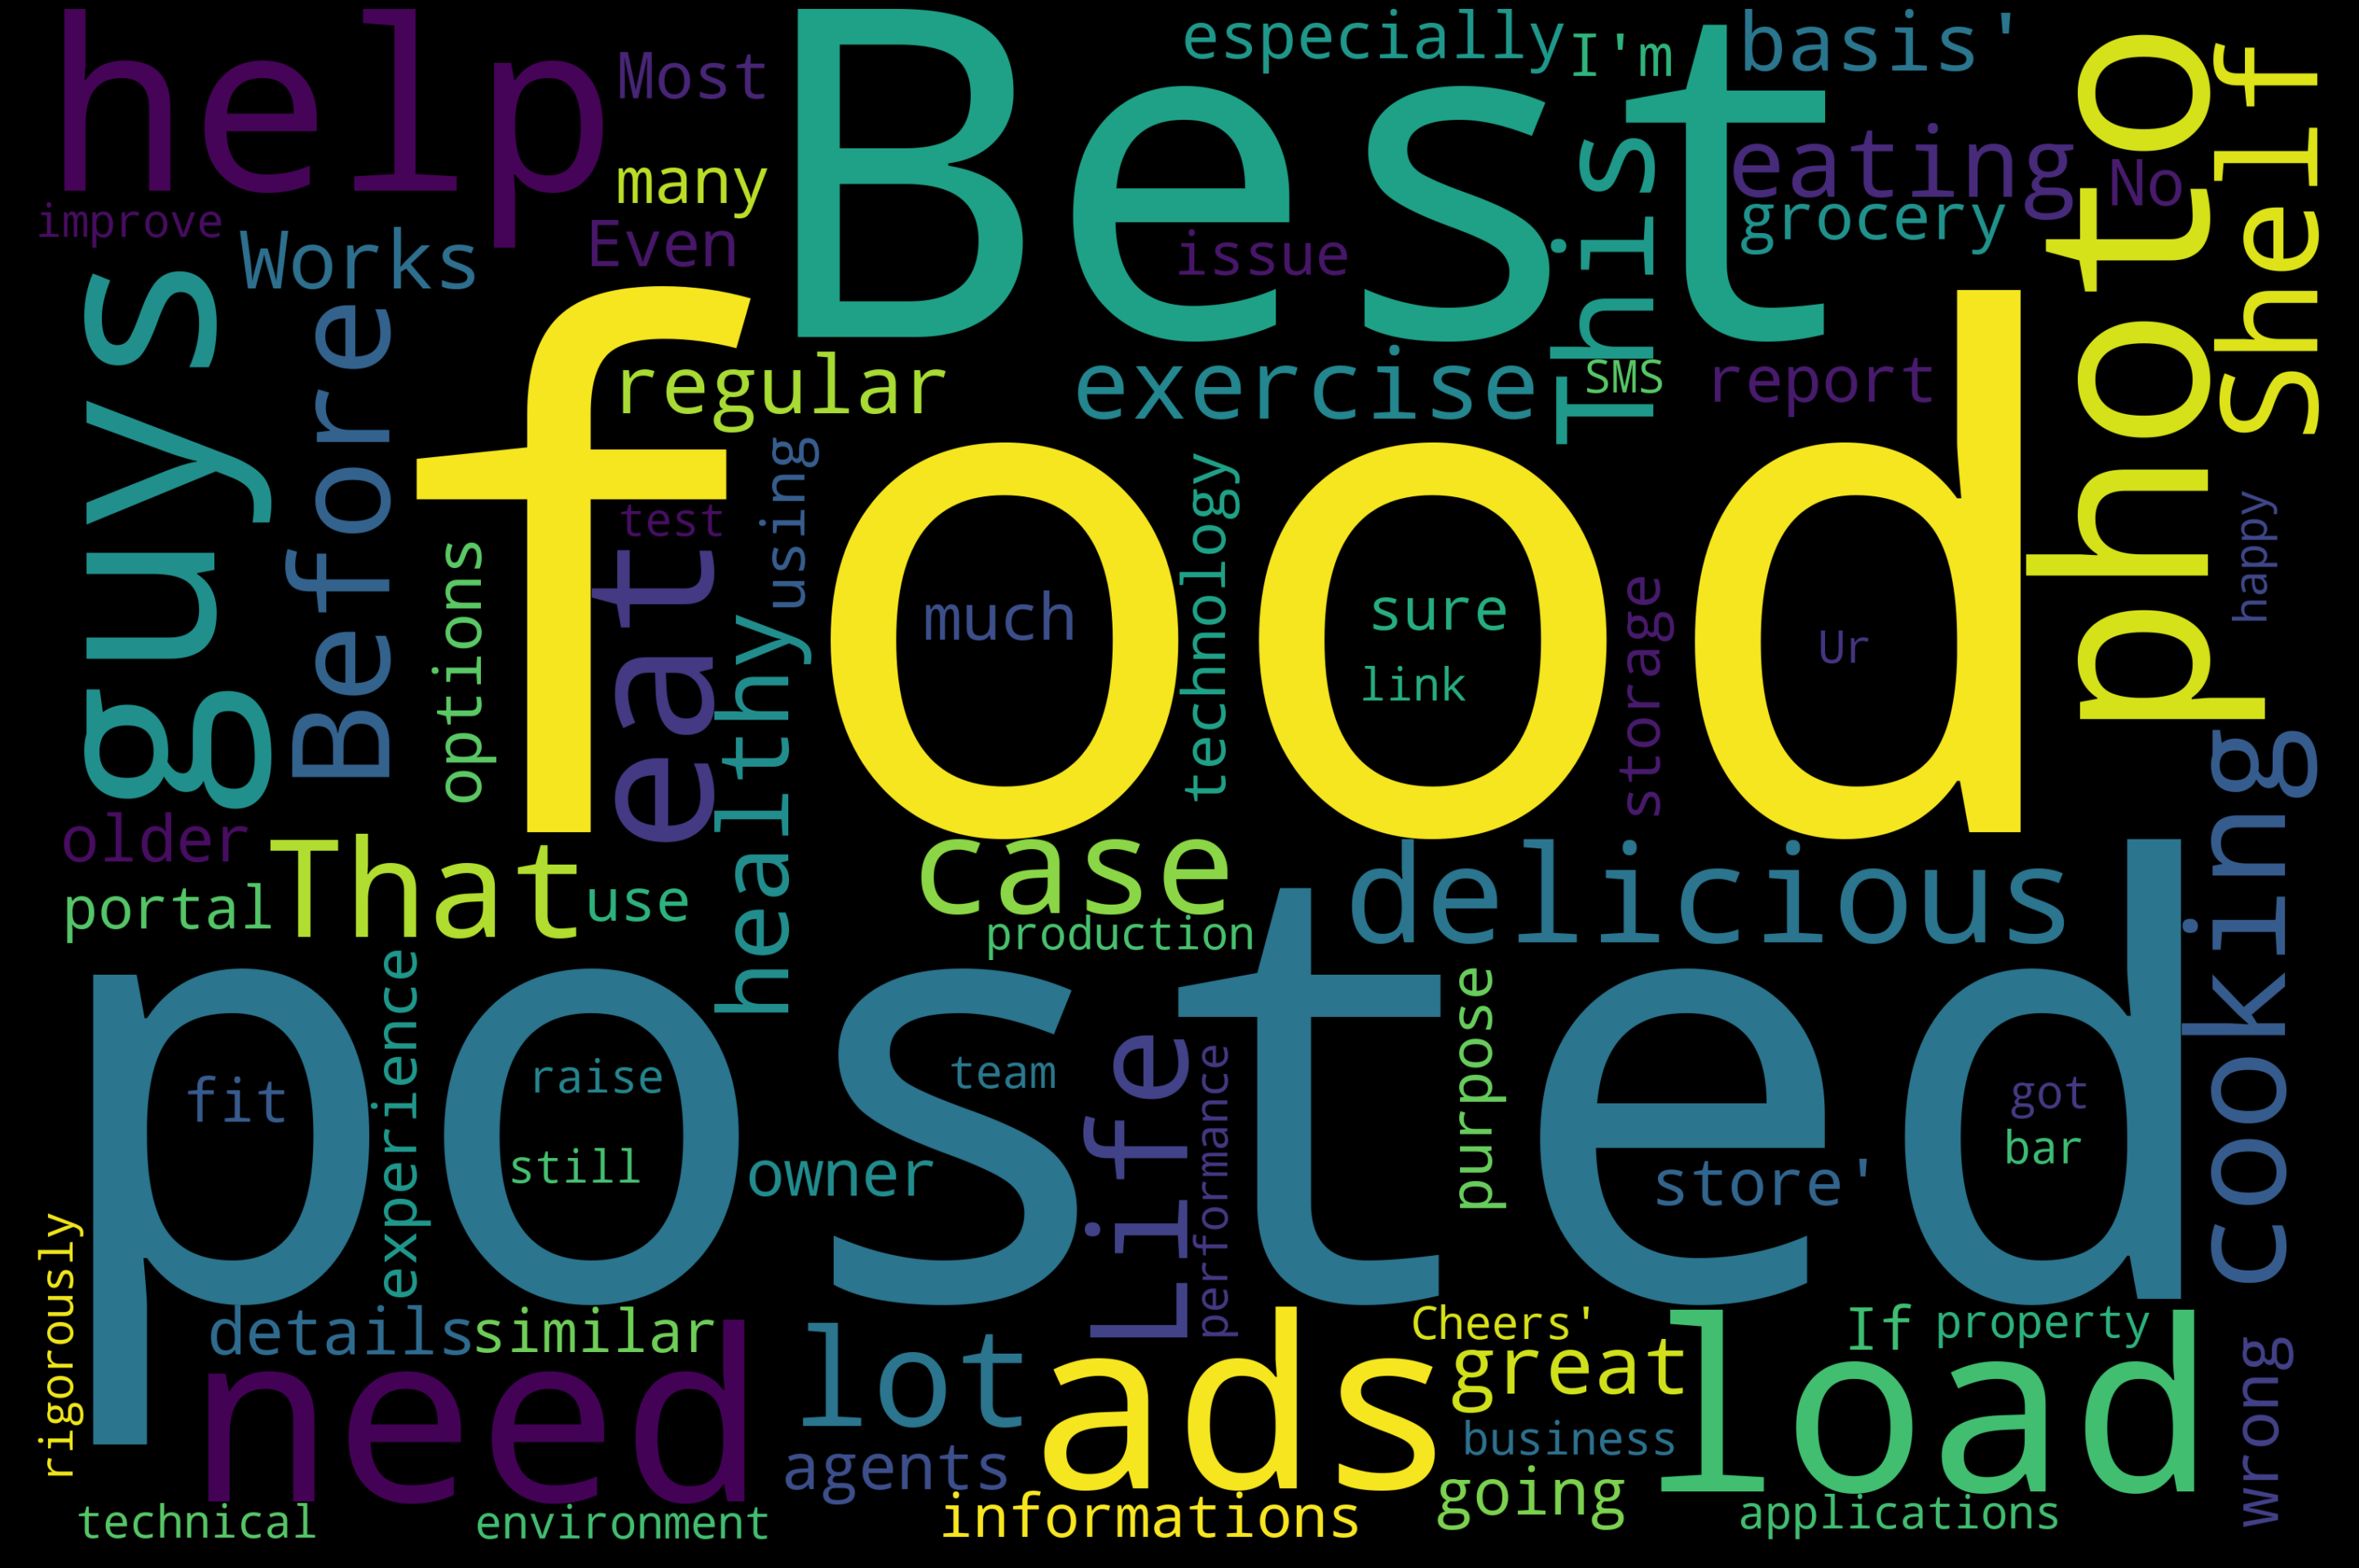

In [16]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(wordP))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

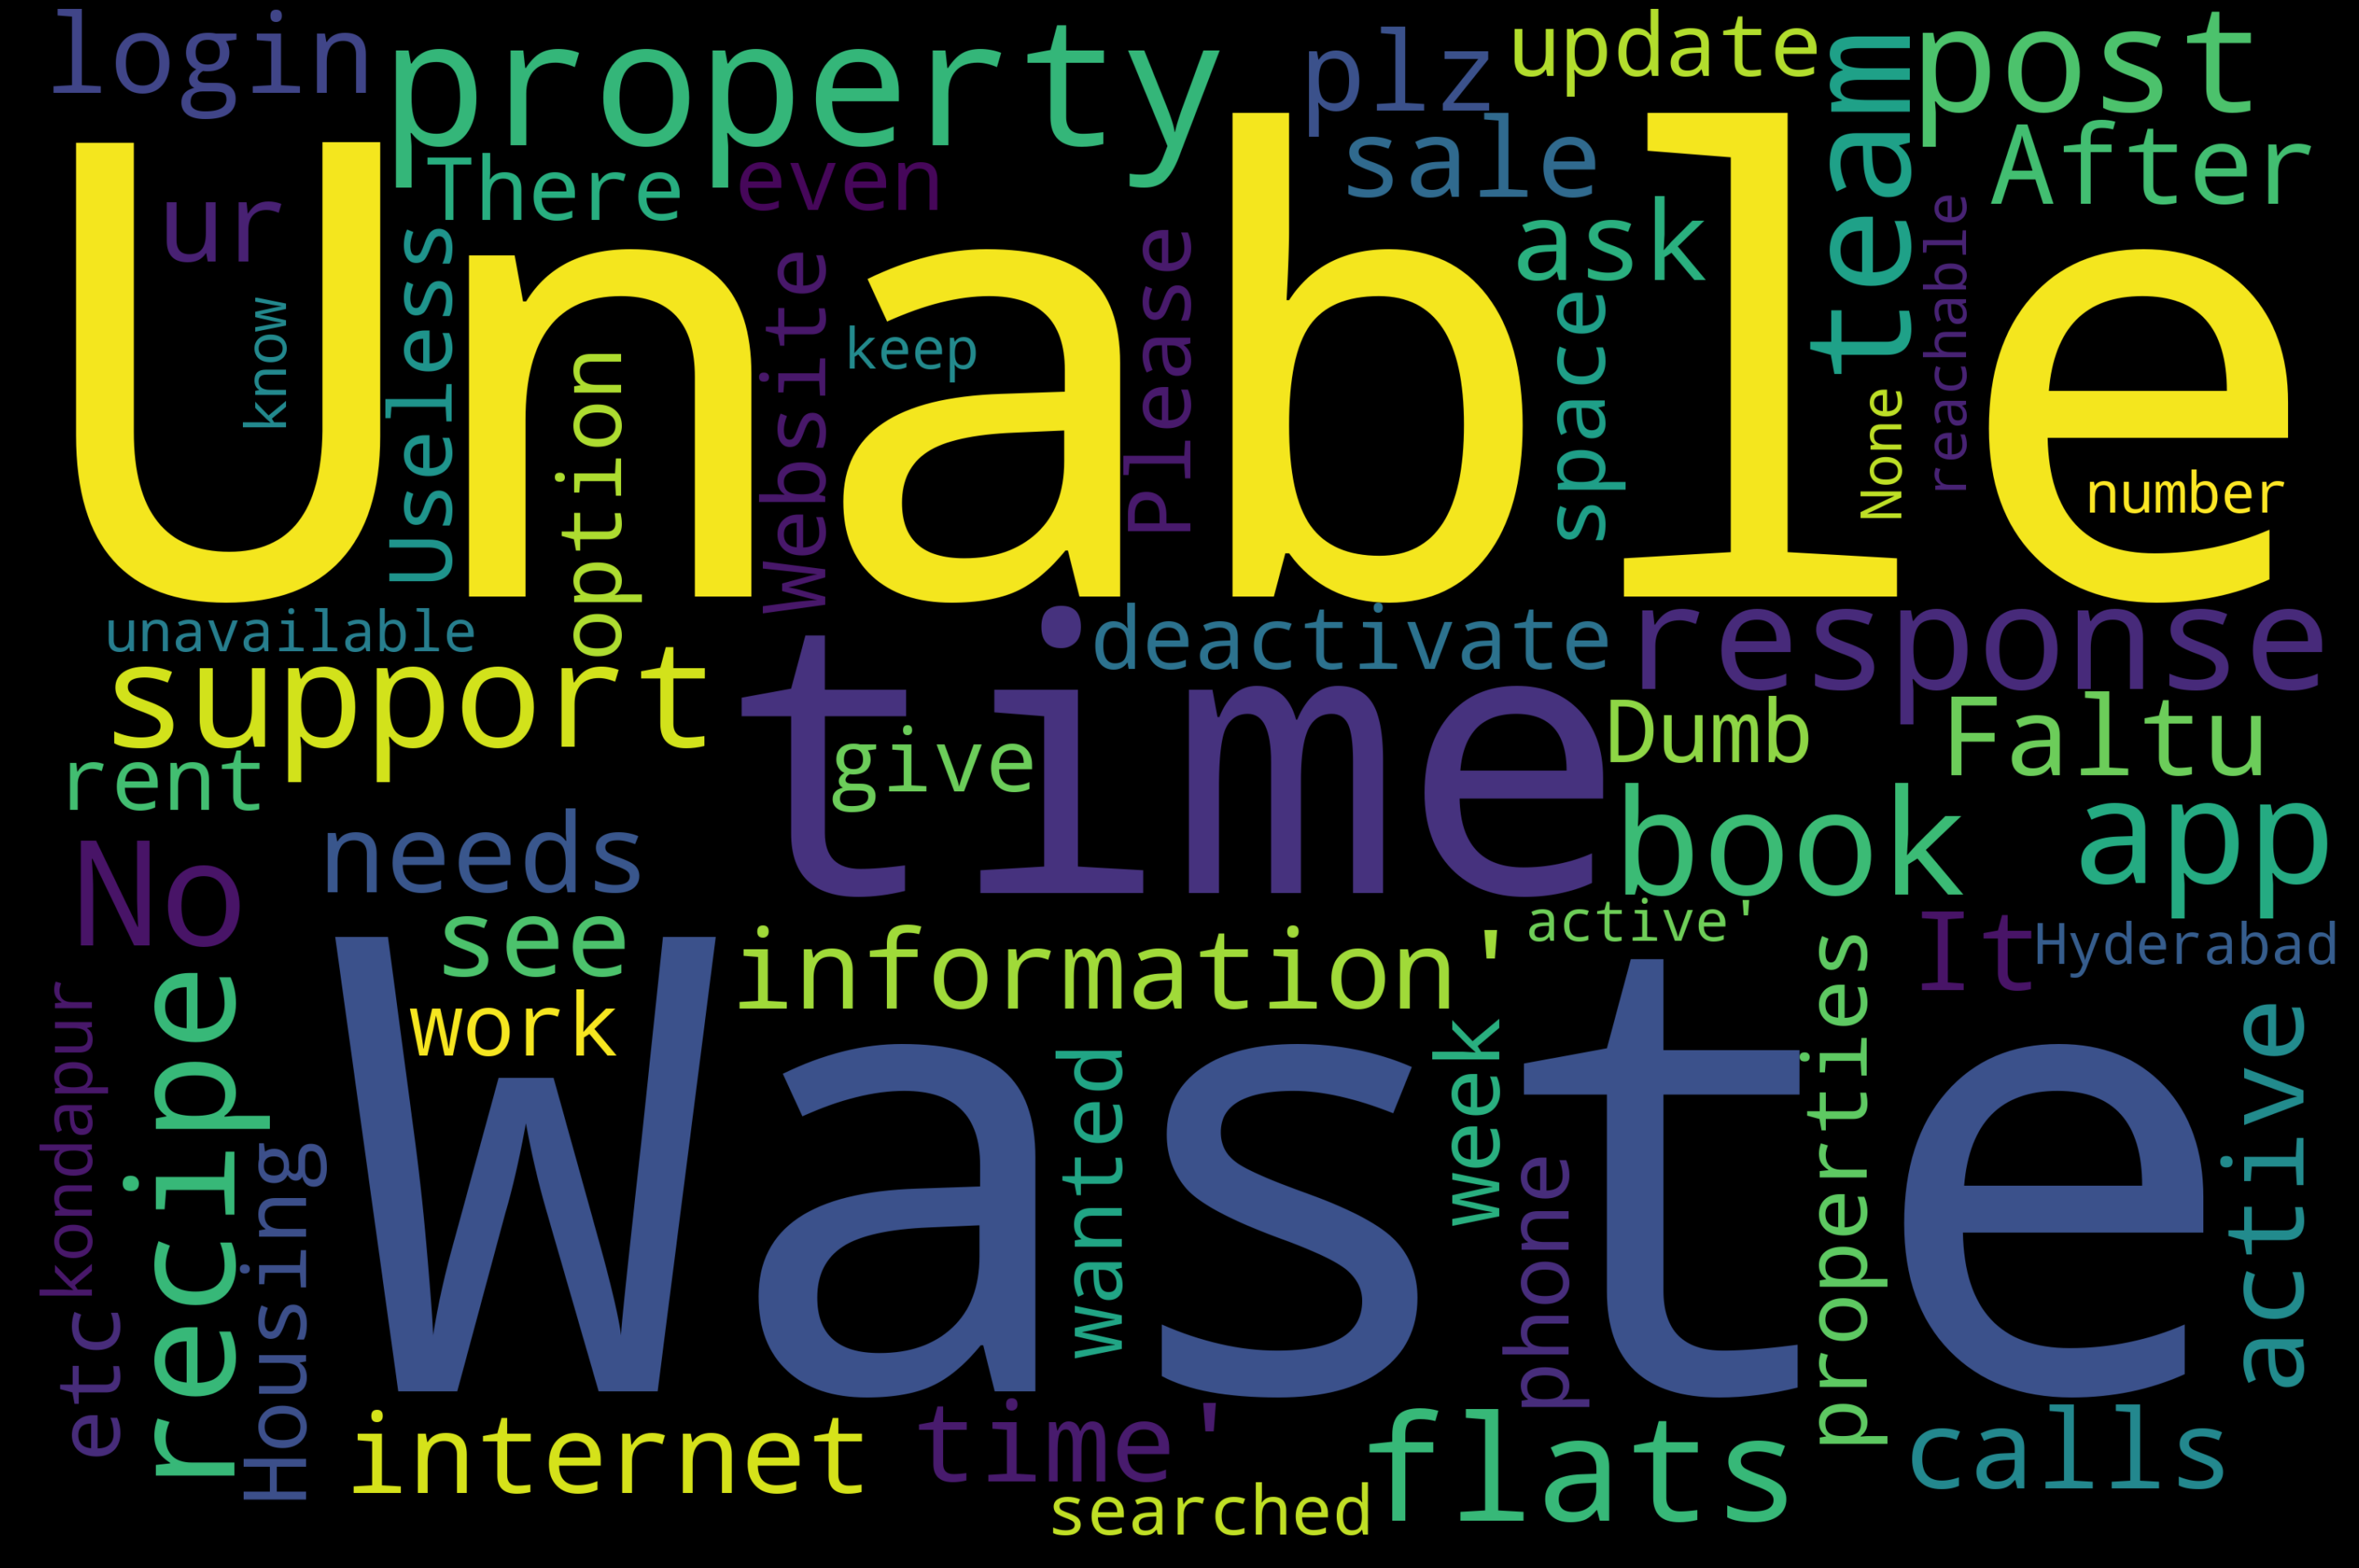

In [17]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(wordN))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

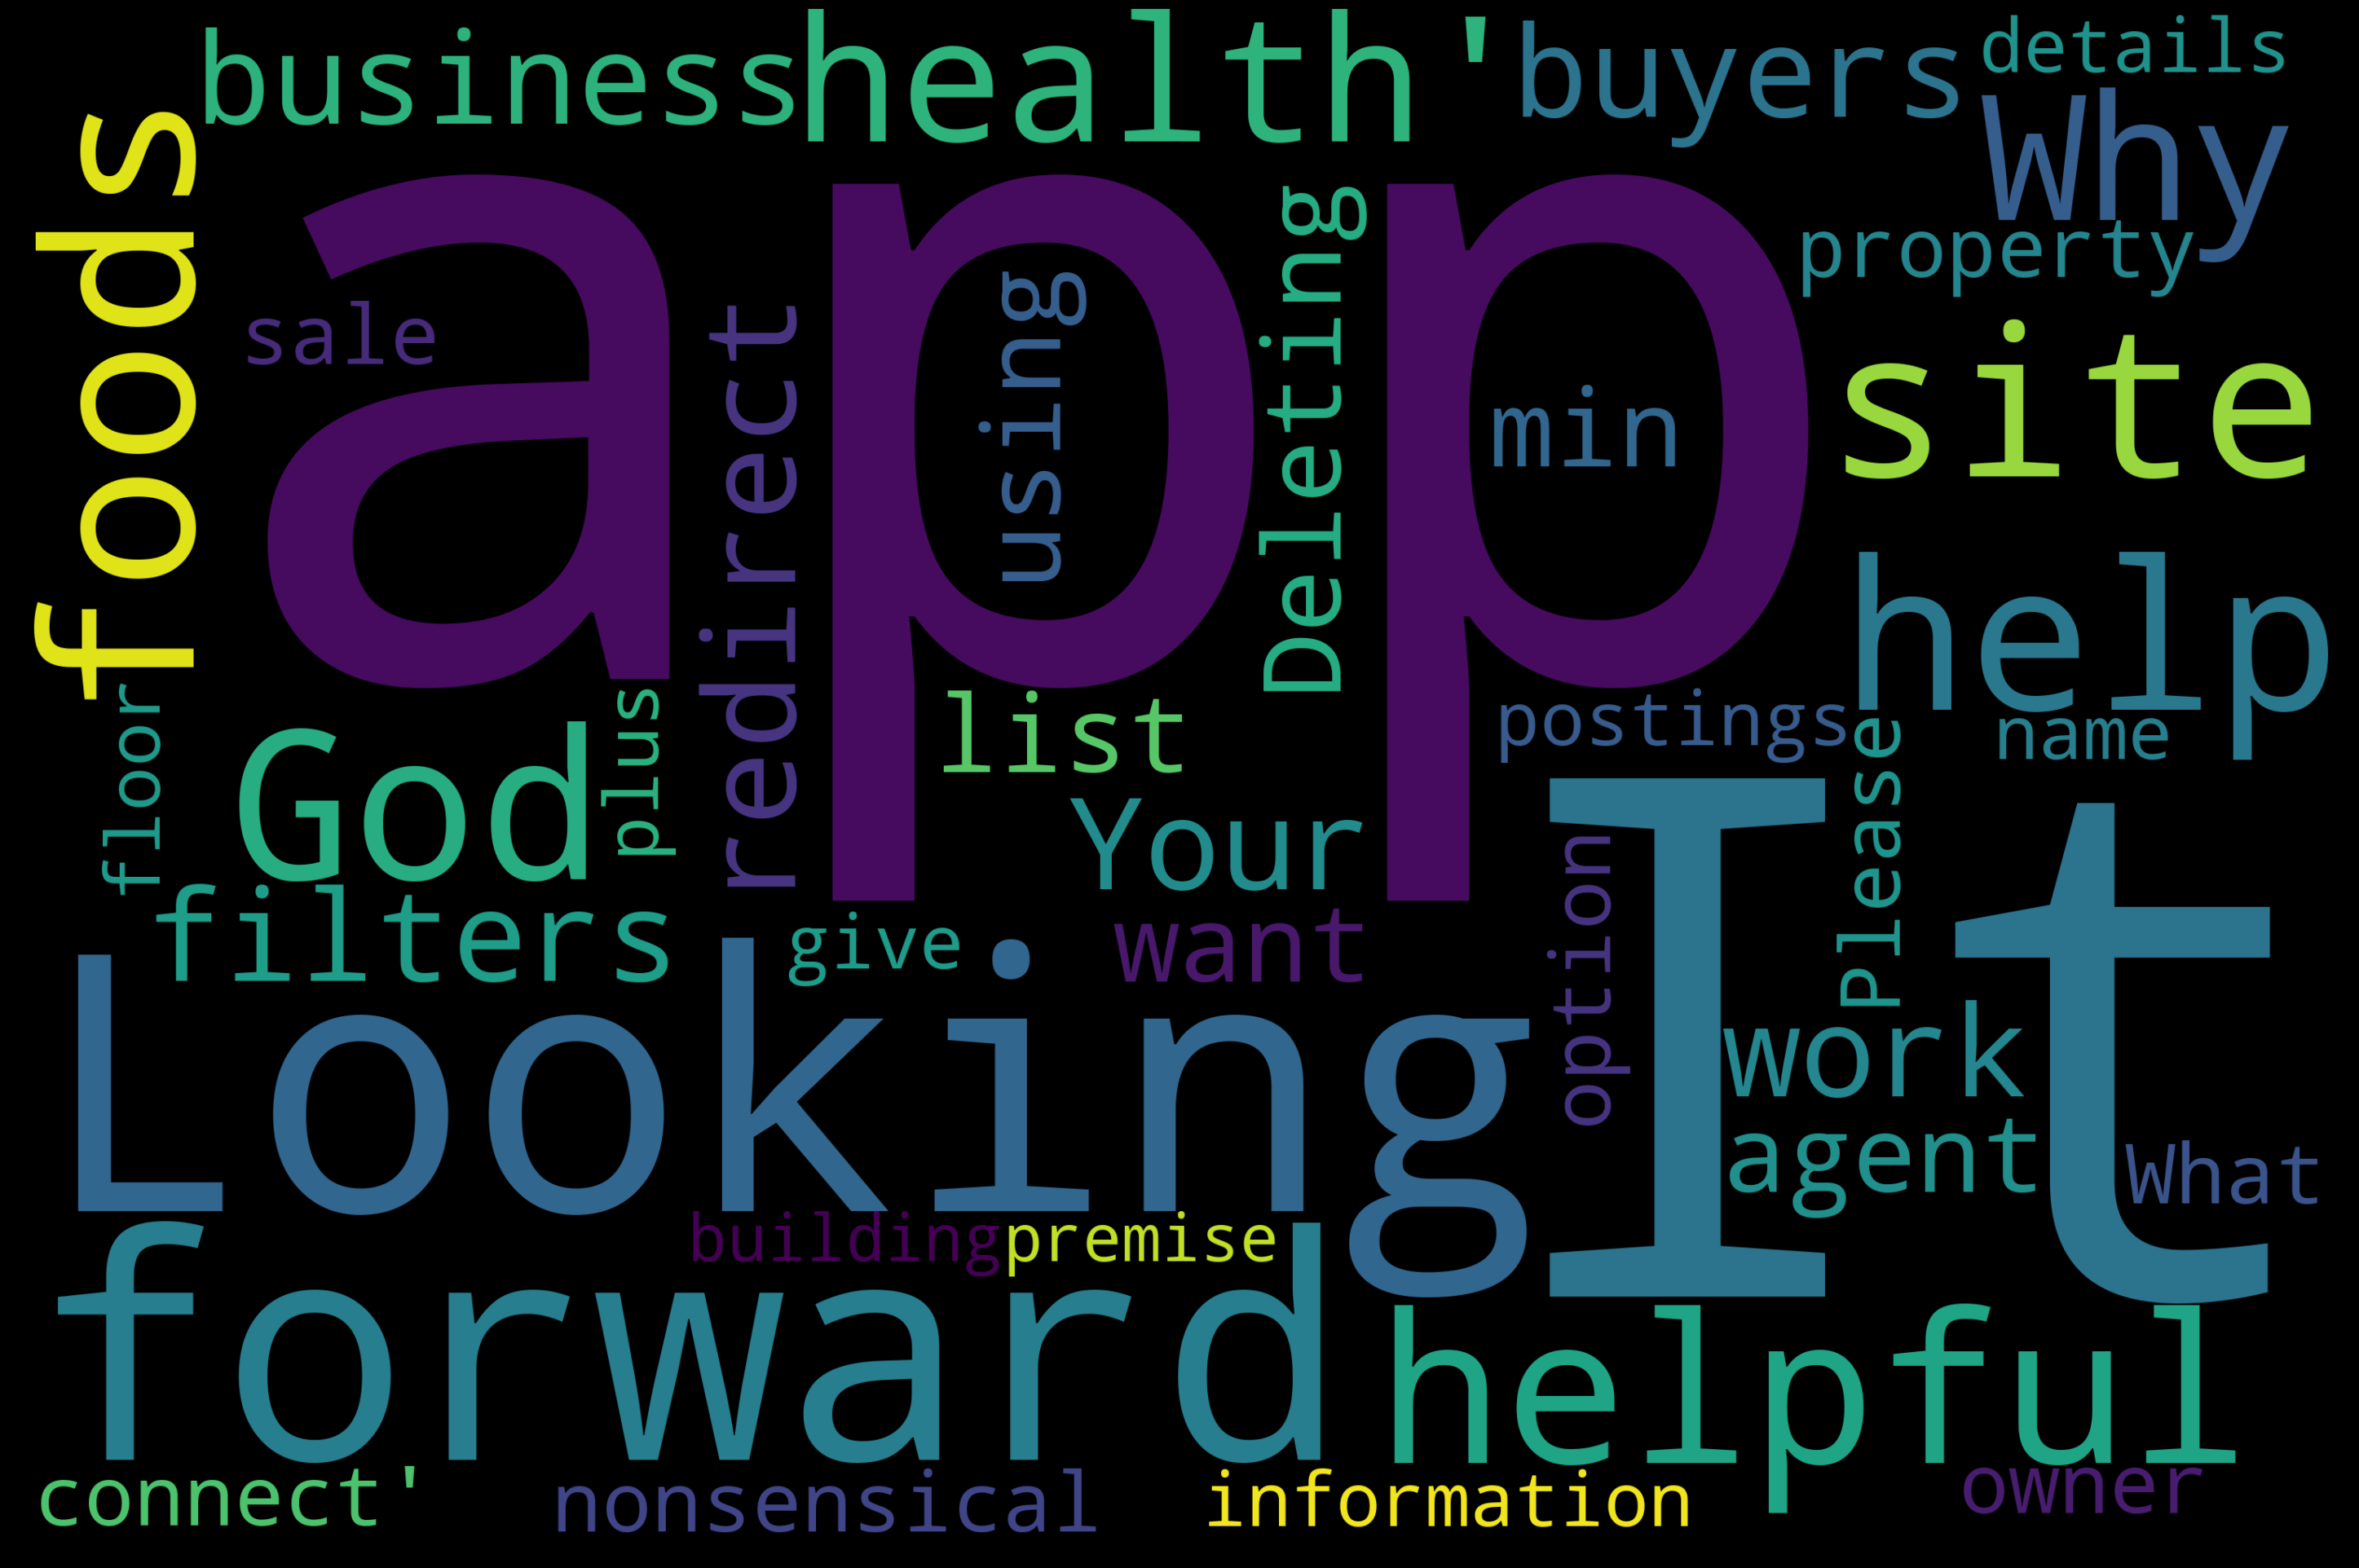

In [18]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(wordT))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()